<a href="https://colab.research.google.com/github/rafa-fortes/Estat-stica-_para-_Ci-ncia-_de-_Dados_e_Machine_Learning/blob/main/Regras_de_associa%C3%A7%C3%A3o(apriori).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
!pip install apyori
from apyori import apriori

In [22]:
dataset = pd.read_csv('/content/sample_data/census.csv')

In [3]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset['age'].max(), dataset['age'].min()

(90, 17)

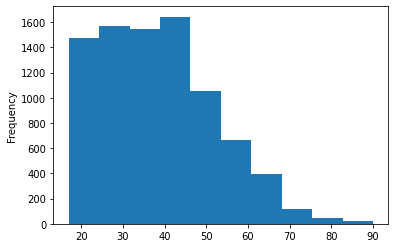

In [5]:
dataset['age'].plot.hist();

In [7]:
dataset['age'] = pd.cut(dataset['age'], bins = [0, 17, 25, 40, 60, 90],
                       labels = ['Faixa1', 'Faixa2', 'Faixa3', 'Faixa4', 'Faixa5'])

In [8]:
dataset

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8525,Faixa4,Self-emp-not-inc,57758,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
8526,Faixa3,Private,207064,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
8527,Faixa2,Private,193090,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,3674,0,40,United-States,<=50K
8528,Faixa5,Private,151364,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [9]:
dataset['age'].unique()

['Faixa3', 'Faixa4', 'Faixa2', 'Faixa5', 'Faixa1']
Categories (5, object): ['Faixa1' < 'Faixa2' < 'Faixa3' < 'Faixa4' < 'Faixa5']

# Regras de associação

In [10]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
dataset_apriori = dataset[['age', 'workclass', 'education', 'marital-status', 'relationship', 'occupation', 'sex', 'native-country', 'income']]

In [14]:
dataset_apriori.head()

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa3,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa3,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,Faixa4,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,Faixa3,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [15]:
dataset_apriori = dataset_apriori.sample(n = 1000)
dataset_apriori.shape

(1000, 9)

In [27]:
transacoes = []
for i in range(dataset_apriori.shape[0]):
  transacoes.append([str(dataset_apriori.values[i, j]) for j in range(dataset_apriori.shape[1])])

In [28]:
len(transacoes)

1000

In [29]:
transacoes[:2]

[['Faixa2',
  ' Private',
  ' Some-college',
  ' Never-married',
  ' Own-child',
  ' Adm-clerical',
  ' Female',
  ' United-States',
  ' <=50K'],
 ['Faixa3',
  ' Self-emp-inc',
  ' Some-college',
  ' Never-married',
  ' Not-in-family',
  ' Exec-managerial',
  ' Male',
  ' United-States',
  ' <=50K']]

In [32]:
regras = apriori(transacoes, min_support = 0.3, min_confidence = 0.2)
resultados = list(regras)

In [33]:
len(resultados)

37

In [34]:
#Regras de associação
resultados

[RelationRecord(items=frozenset({' <=50K'}), support=0.762, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.762, lift=1.0)]),
 RelationRecord(items=frozenset({' Female'}), support=0.312, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Female'}), confidence=0.312, lift=1.0)]),
 RelationRecord(items=frozenset({' HS-grad'}), support=0.326, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' HS-grad'}), confidence=0.326, lift=1.0)]),
 RelationRecord(items=frozenset({' Husband'}), support=0.426, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.426, lift=1.0)]),
 RelationRecord(items=frozenset({' Male'}), support=0.688, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male'}), confidence=0.688, lift=1.0)]),
 RelationRecord(items=frozenset({' Married-civ-spouse'}), support=0

In [35]:
resultados[12]

RelationRecord(items=frozenset({' Private', ' <=50K'}), support=0.528, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Private', ' <=50K'}), confidence=0.528, lift=1.0), OrderedStatistic(items_base=frozenset({' <=50K'}), items_add=frozenset({' Private'}), confidence=0.6929133858267716, lift=1.0086075485105845), OrderedStatistic(items_base=frozenset({' Private'}), items_add=frozenset({' <=50K'}), confidence=0.7685589519650655, lift=1.0086075485105848)])